In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
!pip3 install -q torchviz

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torchviz import make_dot
%matplotlib inline

In [59]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

In [60]:
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_loader  = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

### Visualize the Data

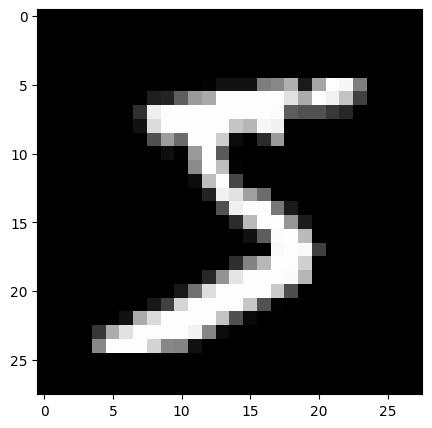

In [61]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

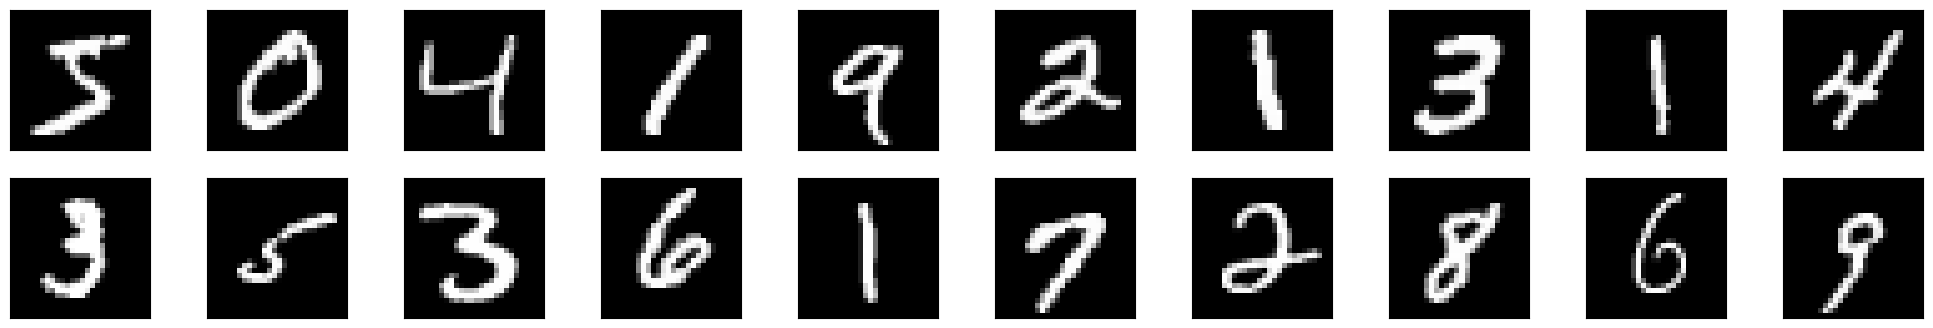

In [62]:
# plot multiple input images in each row
fig, axs = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

for i in range(2):
    for j in range(10):
        axs[i, j].imshow(np.squeeze(images[i * 10 + j]), cmap='gray')
        axs[i, j].get_xaxis().set_visible(False)
        axs[i, j].get_yaxis().set_visible(False)

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


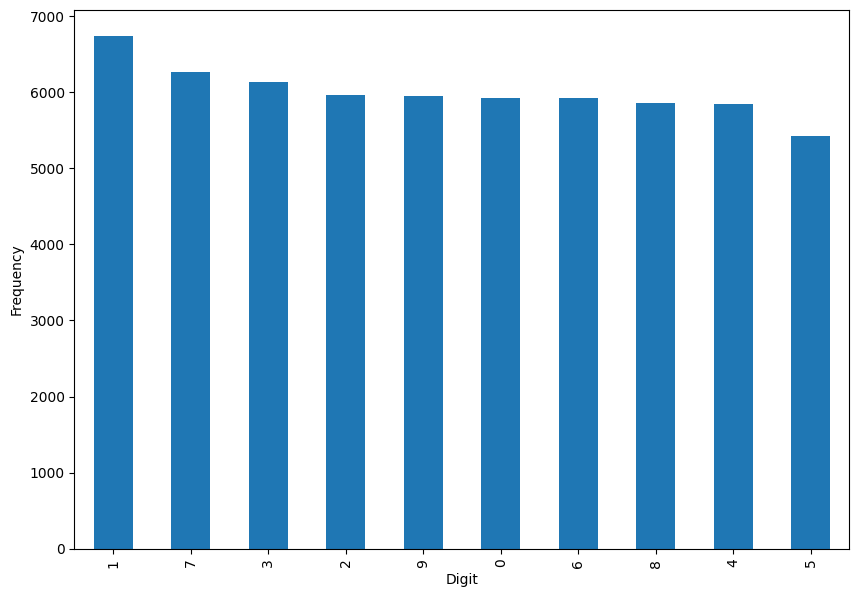

In [63]:
plt.figure(figsize = (10,7))
pd.value_counts(np.array(train_data.train_labels)).plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Digit')
plt.show()

In [64]:
pd.value_counts(np.array(train_data.train_labels))

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [65]:
# define the NN architecture
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        ## encoder ##
        # linear layer (784 -> encoding_dim)
        self.fc1 = nn.Linear(28 * 28, encoding_dim)

        ## decoder ##
        # linear layer (encoding_dim -> input size)
        self.fc2 = nn.Linear(encoding_dim, 28*28)


    def forward(self, x):
        # add layer, with relu activation function
        x = F.relu(self.fc1(x))
        # output layer (sigmoid for scaling from 0 to 1)
        x = F.sigmoid(self.fc2(x))
        return x

In [66]:
# initialize the simple Autoencoder
encoding_dim = 32
simple_model = Autoencoder(encoding_dim)
print(simple_model)

Autoencoder(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=784, bias=True)
)


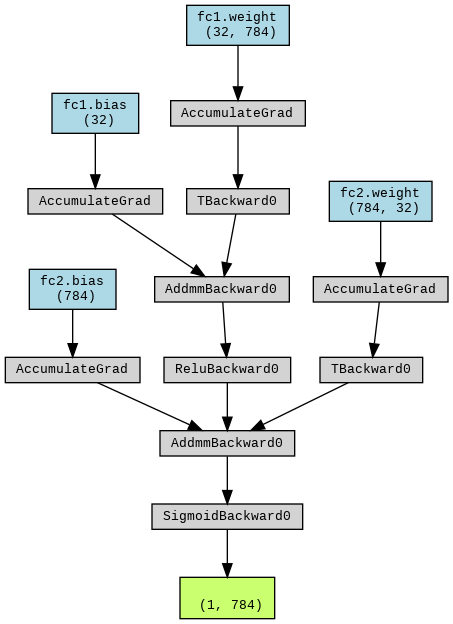

In [75]:
# Create a random input tensor with the appropriate size
sample_input = torch.randn((1, 28 * 28))

# Pass the input through the model and generate a graph
output = simple_model(sample_input)
graph = make_dot(output, params=dict(simple_model.named_parameters()))

# Save the graph as a PNG file
graph.render(filename='/content/drive/MyDrive/Career/CODE/MNIST Image Retrevial/assets/autoencoder_graph', format='png', cleanup=True)

from IPython.display import Image, display
display(Image(filename='/content/drive/MyDrive/Career/CODE/MNIST Image Retrevial/assets/autoencoder_graph.png'))

In [76]:
def train_model(model, optimizer, criterion, device, n_epochs = 100, simple = False):
    model.to(device)
    for epoch in range(1, n_epochs+1):
    # monitor training loss
        train_loss = 0.0

        ###################
        # train the model #
        ###################

        for data in train_loader:
            # _ stands in for labels, here
            # no need to flatten images
            images, _ = data
            if(simple):
                images = images.view(images.size(0), -1)
            images = images.to(device)
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            outputs = model(images)
            # calculate the loss
            loss = criterion(outputs, images)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*images.size(0)

        # print avg training statistics
        train_loss = train_loss/len(train_loader)
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch,
            train_loss
            ))

In [77]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [78]:
# specify loss function
criterion = nn.MSELoss()
# specify optimizer
optimizer = torch.optim.Adam(simple_model.parameters(), lr=0.01)

In [79]:
# number of epochs to train the model
n_epochs = 100
train_model(simple_model, optimizer, criterion, device, n_epochs, True)

Epoch: 1 	Training Loss: 0.535819
Epoch: 2 	Training Loss: 0.466685
Epoch: 3 	Training Loss: 0.461320
Epoch: 4 	Training Loss: 0.458367
Epoch: 5 	Training Loss: 0.456957
Epoch: 6 	Training Loss: 0.456058
Epoch: 7 	Training Loss: 0.455630
Epoch: 8 	Training Loss: 0.455115
Epoch: 9 	Training Loss: 0.454958
Epoch: 10 	Training Loss: 0.454333
Epoch: 11 	Training Loss: 0.453917
Epoch: 12 	Training Loss: 0.454003
Epoch: 13 	Training Loss: 0.453813
Epoch: 14 	Training Loss: 0.454134
Epoch: 15 	Training Loss: 0.454246
Epoch: 16 	Training Loss: 0.454108
Epoch: 17 	Training Loss: 0.454060
Epoch: 18 	Training Loss: 0.454123
Epoch: 19 	Training Loss: 0.453963
Epoch: 20 	Training Loss: 0.453600
Epoch: 21 	Training Loss: 0.453581
Epoch: 22 	Training Loss: 0.453825
Epoch: 23 	Training Loss: 0.454005
Epoch: 24 	Training Loss: 0.454098
Epoch: 25 	Training Loss: 0.454135
Epoch: 26 	Training Loss: 0.454534
Epoch: 27 	Training Loss: 0.454148
Epoch: 28 	Training Loss: 0.453563
Epoch: 29 	Training Loss: 0.4

In [80]:
PATH_SIMPLE = '/content/drive/MyDrive/Career/CODE/MNIST Image Retrevial/assets/autoencoder_simple.pt'
torch.save(simple_model.state_dict(), PATH_SIMPLE)

In [81]:
simple_model.load_state_dict(torch.load(PATH_SIMPLE))

<All keys matched successfully>

In [82]:
simple_encoder = nn.Sequential(*list(simple_model.children())[:1])
print(simple_encoder)

Sequential(
  (0): Linear(in_features=784, out_features=32, bias=True)
)


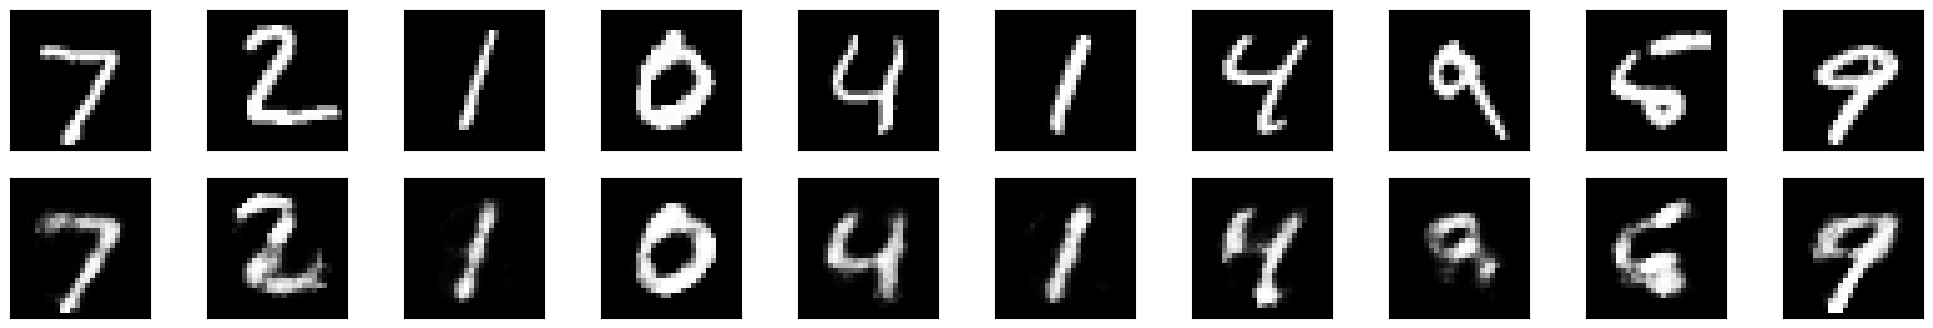

In [83]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.view(images.size(0), -1)

# get sample outputs
output = simple_model(images.to(device))

images = images.numpy()
# output is resized into a batch of images
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img.reshape(28,28)), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [86]:
# define the NN architecture
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        ## encoder layers ##
        self.conv1 = nn.Conv2d(1,16,3,padding = 1)
        self.conv2 = nn.Conv2d(16,4,3,padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)


    def forward(self, x):
        ## encode ##
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        ## decode ##
        ## apply ReLu to all hidden layers *except for the output layer
        ## apply a sigmoid to the output layer
        x = F.relu(self.t_conv1(x))
        x = F.sigmoid(self.t_conv2(x))

        return x

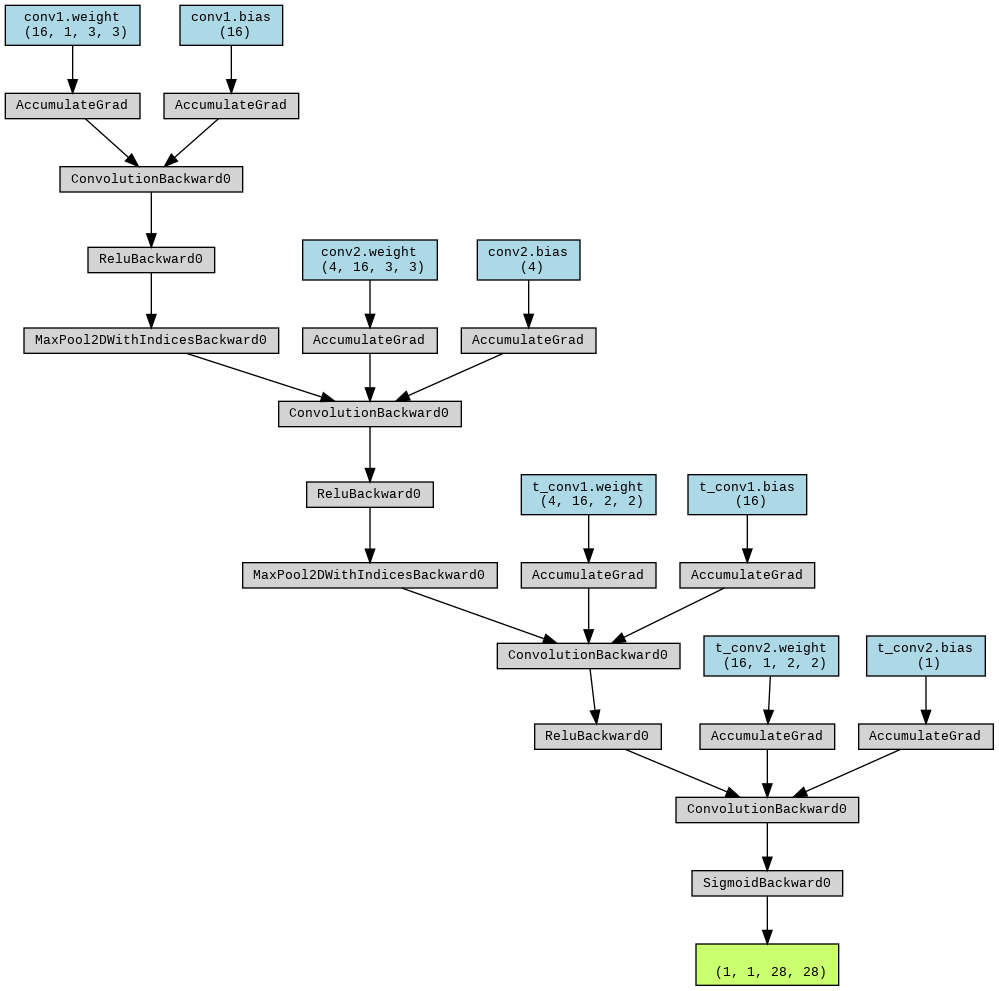

In [87]:

# initialize the convolutional Autoencoder
model = ConvAutoencoder()
# Create a random input tensor with the appropriate size
sample_input = torch.randn((1, 1, 28, 28))

# Pass the input through the model and generate a graph
output = model(sample_input)
graph = make_dot(output, params=dict(model.named_parameters()))

# Save the graph as a PNG file
graph.render(filename='/content/drive/MyDrive/Career/CODE/MNIST Image Retrevial/assets/conv_autoencoder_graph', format='png', cleanup=True)
display(Image(filename='/content/drive/MyDrive/Career/CODE/MNIST Image Retrevial/assets/conv_autoencoder_graph.png'))

In [88]:
# specify loss function
criterion = nn.MSELoss()
# specify loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [89]:
# number of epochs to train the model
n_epochs = 100
train_model(model, optimizer, criterion, device, n_epochs)

Epoch: 1 	Training Loss: 0.323899
Epoch: 2 	Training Loss: 0.244730
Epoch: 3 	Training Loss: 0.238754
Epoch: 4 	Training Loss: 0.236512
Epoch: 5 	Training Loss: 0.235292
Epoch: 6 	Training Loss: 0.234440
Epoch: 7 	Training Loss: 0.233538
Epoch: 8 	Training Loss: 0.231988
Epoch: 9 	Training Loss: 0.230455
Epoch: 10 	Training Loss: 0.229478
Epoch: 11 	Training Loss: 0.228638
Epoch: 12 	Training Loss: 0.228091
Epoch: 13 	Training Loss: 0.227626
Epoch: 14 	Training Loss: 0.227240
Epoch: 15 	Training Loss: 0.226745
Epoch: 16 	Training Loss: 0.226439
Epoch: 17 	Training Loss: 0.226134
Epoch: 18 	Training Loss: 0.225871
Epoch: 19 	Training Loss: 0.225427
Epoch: 20 	Training Loss: 0.224611
Epoch: 21 	Training Loss: 0.224080
Epoch: 22 	Training Loss: 0.223572
Epoch: 23 	Training Loss: 0.223265
Epoch: 24 	Training Loss: 0.223068
Epoch: 25 	Training Loss: 0.222899
Epoch: 26 	Training Loss: 0.222783
Epoch: 27 	Training Loss: 0.222670
Epoch: 28 	Training Loss: 0.222546
Epoch: 29 	Training Loss: 0.2

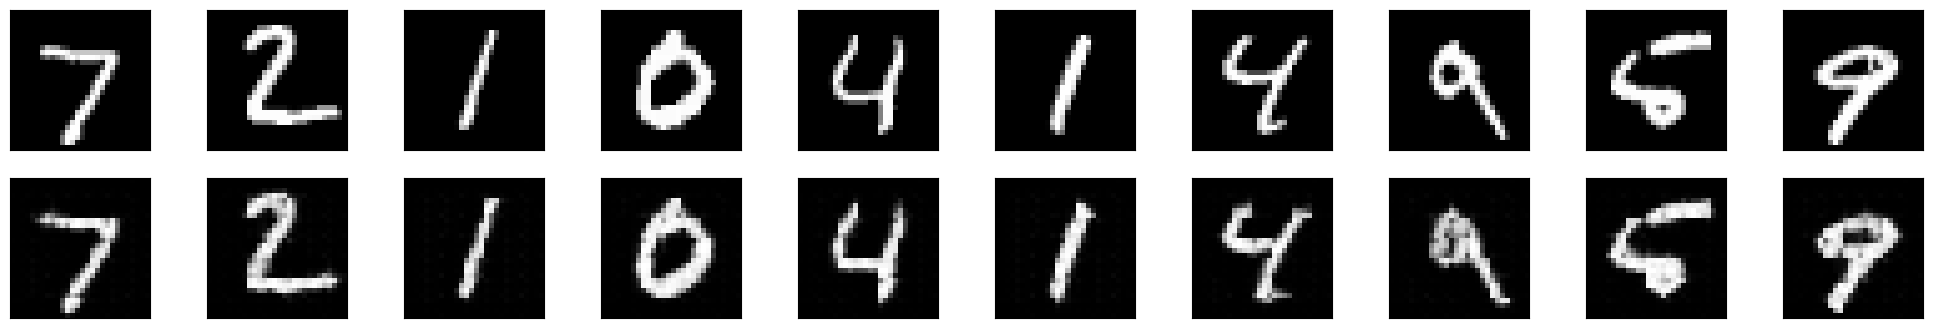

In [90]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images.to(device))
# prep images for display
images = images.numpy()

# output is resized into a batch of images
output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))
# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [91]:
PATH = '/content/drive/MyDrive/Career/CODE/MNIST Image Retrevial/assets/auto_encoder.pt'
torch.save(model.state_dict(), PATH)

In [92]:
model.load_state_dict(torch.load(PATH))
model.cuda()

ConvAutoencoder(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
  (t_conv2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
)

In [93]:
class ConvEncoder(nn.Module):
    def __init__(self):
        super(ConvEncoder, self).__init__()
        ## encoder layers ##
        self.layer1 = nn.Sequential(*list(model.children())[:3])
        self.pool = [*list(model.children())][2]

    def forward(self, x):
        ## encode ##
        x = self.layer1(x)
        x = self.pool(x)

        return x

# initialize the Encoder
encoder = ConvEncoder()
encoder.to(device)

ConvEncoder(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [94]:
def compute_accuracy(query_imgs_ids, similar_imgs_ids):
    """ return the accuracy of the retrieval process.
    Args:
        query_imgs_ids: a list of ids to the query images.
        similar_imgs_ids: a list of lists of similar images id to each query image.

    """
    total_imgs = len(similar_imgs_ids[0]) * len(query_imgs_ids)
    correctly_retrieved_counter = 0

    for i, query_img_id in enumerate(query_imgs_ids):
        query_img, query_label = test_data[int(query_img_id)]
        for image in similar_imgs_ids[i]:
            img, label = train_data[int(image)]
            if label == query_label:
                correctly_retrieved_counter += 1
    return correctly_retrieved_counter/total_imgs

In [95]:
def show_retrieved_images(similar_indexes, n = 10):
    # get similar images from indexes
    similar_images = np.array([], dtype='float32').reshape(0, 7, 1, 28, 28)

    for i, images in enumerate(similar_indexes):
        temp = np.array([], dtype='float32').reshape(0, 1, 28, 28)
        for image in images:
            img, _ = train_data[int(image)]
            temp = np.concatenate((temp, img.reshape(1, 1, 28, 28)))
        similar_images = np.concatenate((similar_images, temp.reshape(1, 7, 1, 28, 28)))

    # plot
    print('The query image to the left is followed by 7 similar images retrieved from the training data set')
    # plot the first ten input images and then reconstructed images
    nrows = n
    fig, axes = plt.subplots(nrows=nrows, ncols=8, sharex=True, sharey=True, figsize=(25,25))

    for i, b in enumerate(range(similar_images.shape[0])):
        if i == nrows:
            break
        t_img, _ = test_data[i]
        axes[i, 0].imshow(np.squeeze(t_img), cmap='gray')
        axes[i, 0].get_xaxis().set_visible(False)
        axes[i, 0].get_yaxis().set_visible(False)
        for j in range(similar_images.shape[1]):
            axes[i, j+1].imshow(np.squeeze(similar_images[i][j]), cmap='gray')
            axes[i, j+1].get_xaxis().set_visible(False)
            axes[i, j+1].get_yaxis().set_visible(False)

In [96]:
# Function to retrieve the closest images
def retrieve_closest_images(test_feature, trained_features, n=7):

    # initialize the distance list
    distances = []

    for features in trained_features:
        distance = np.linalg.norm(features - test_feature)
        distances.append(distance) # append to the distance list

    n_elements = trained_features.shape[0] # total number of images in the training set
    distances = np.array(distances) # convert the distance list to a numpy array
    trained_features_index = np.arange(n_elements) # creae an index list from 0 - n_elements

    # create a numpy stack with the distances, index_list
    distances_with_index = np.stack((distances, trained_features_index), axis=-1)
    sorted_distance_with_index = distances_with_index[distances_with_index[:,0].argsort()] # sort the stack

    sorted_distances = sorted_distance_with_index[:, 0].astype('float32') # change the datatype
    sorted_indexes = sorted_distance_with_index[:, 1]

    kept_indexes = sorted_indexes[:n] # Get the first n indexes of the sorted_indexes list

    return kept_indexes.astype('int')

In [97]:
# get all similar images to the first 100 test set given a model
def get_similar_indexes(model, trained_features, simple = False):
    similar_indexes = []
    for i, data in enumerate(test_data):
        if i == 100:
            break
        test_image, _ = data
        test_image = test_image.to(device)
        test_image = test_image.view(1,1,28,28)
        if(simple):
            test_image = images.view(images.size(0), -1)

        # predict the encoder layer codes for the test image
        test_feature = model.forward(test_image).cpu().detach().numpy()

        # get top 7 similar images
        similar_indexes.append(retrieve_closest_images(test_feature, trained_features))
    return similar_indexes

### Simple Autoencoder evaluation

In [98]:
# initialize the training features
trained_simple_features = np.array([], dtype='float32').reshape(0, 20, 32)
# predict the encoder layer features for the training dataset
for data in train_loader:
    images, _ = data
    images = images.to(device)
    images = images.view(images.size(0), -1)
    predicted_features = simple_encoder.forward(images).cpu().detach().numpy()
    predicted_features = predicted_features.reshape(1, 20, 32)
    trained_simple_features = np.concatenate((trained_simple_features, predicted_features))

In [99]:
# get similar indices
simple_similar_indexes = get_similar_indexes(simple_encoder, trained_simple_features, True)

In [100]:
# calculate accuracy for the first 100 test images
print('The accuracy of the simple autoencoder:', compute_accuracy(range(100), simple_similar_indexes))

The accuracy of the simple autoencoder: 0.10571428571428572


The query image to the left is followed by 7 similar images retrieved from the training data set


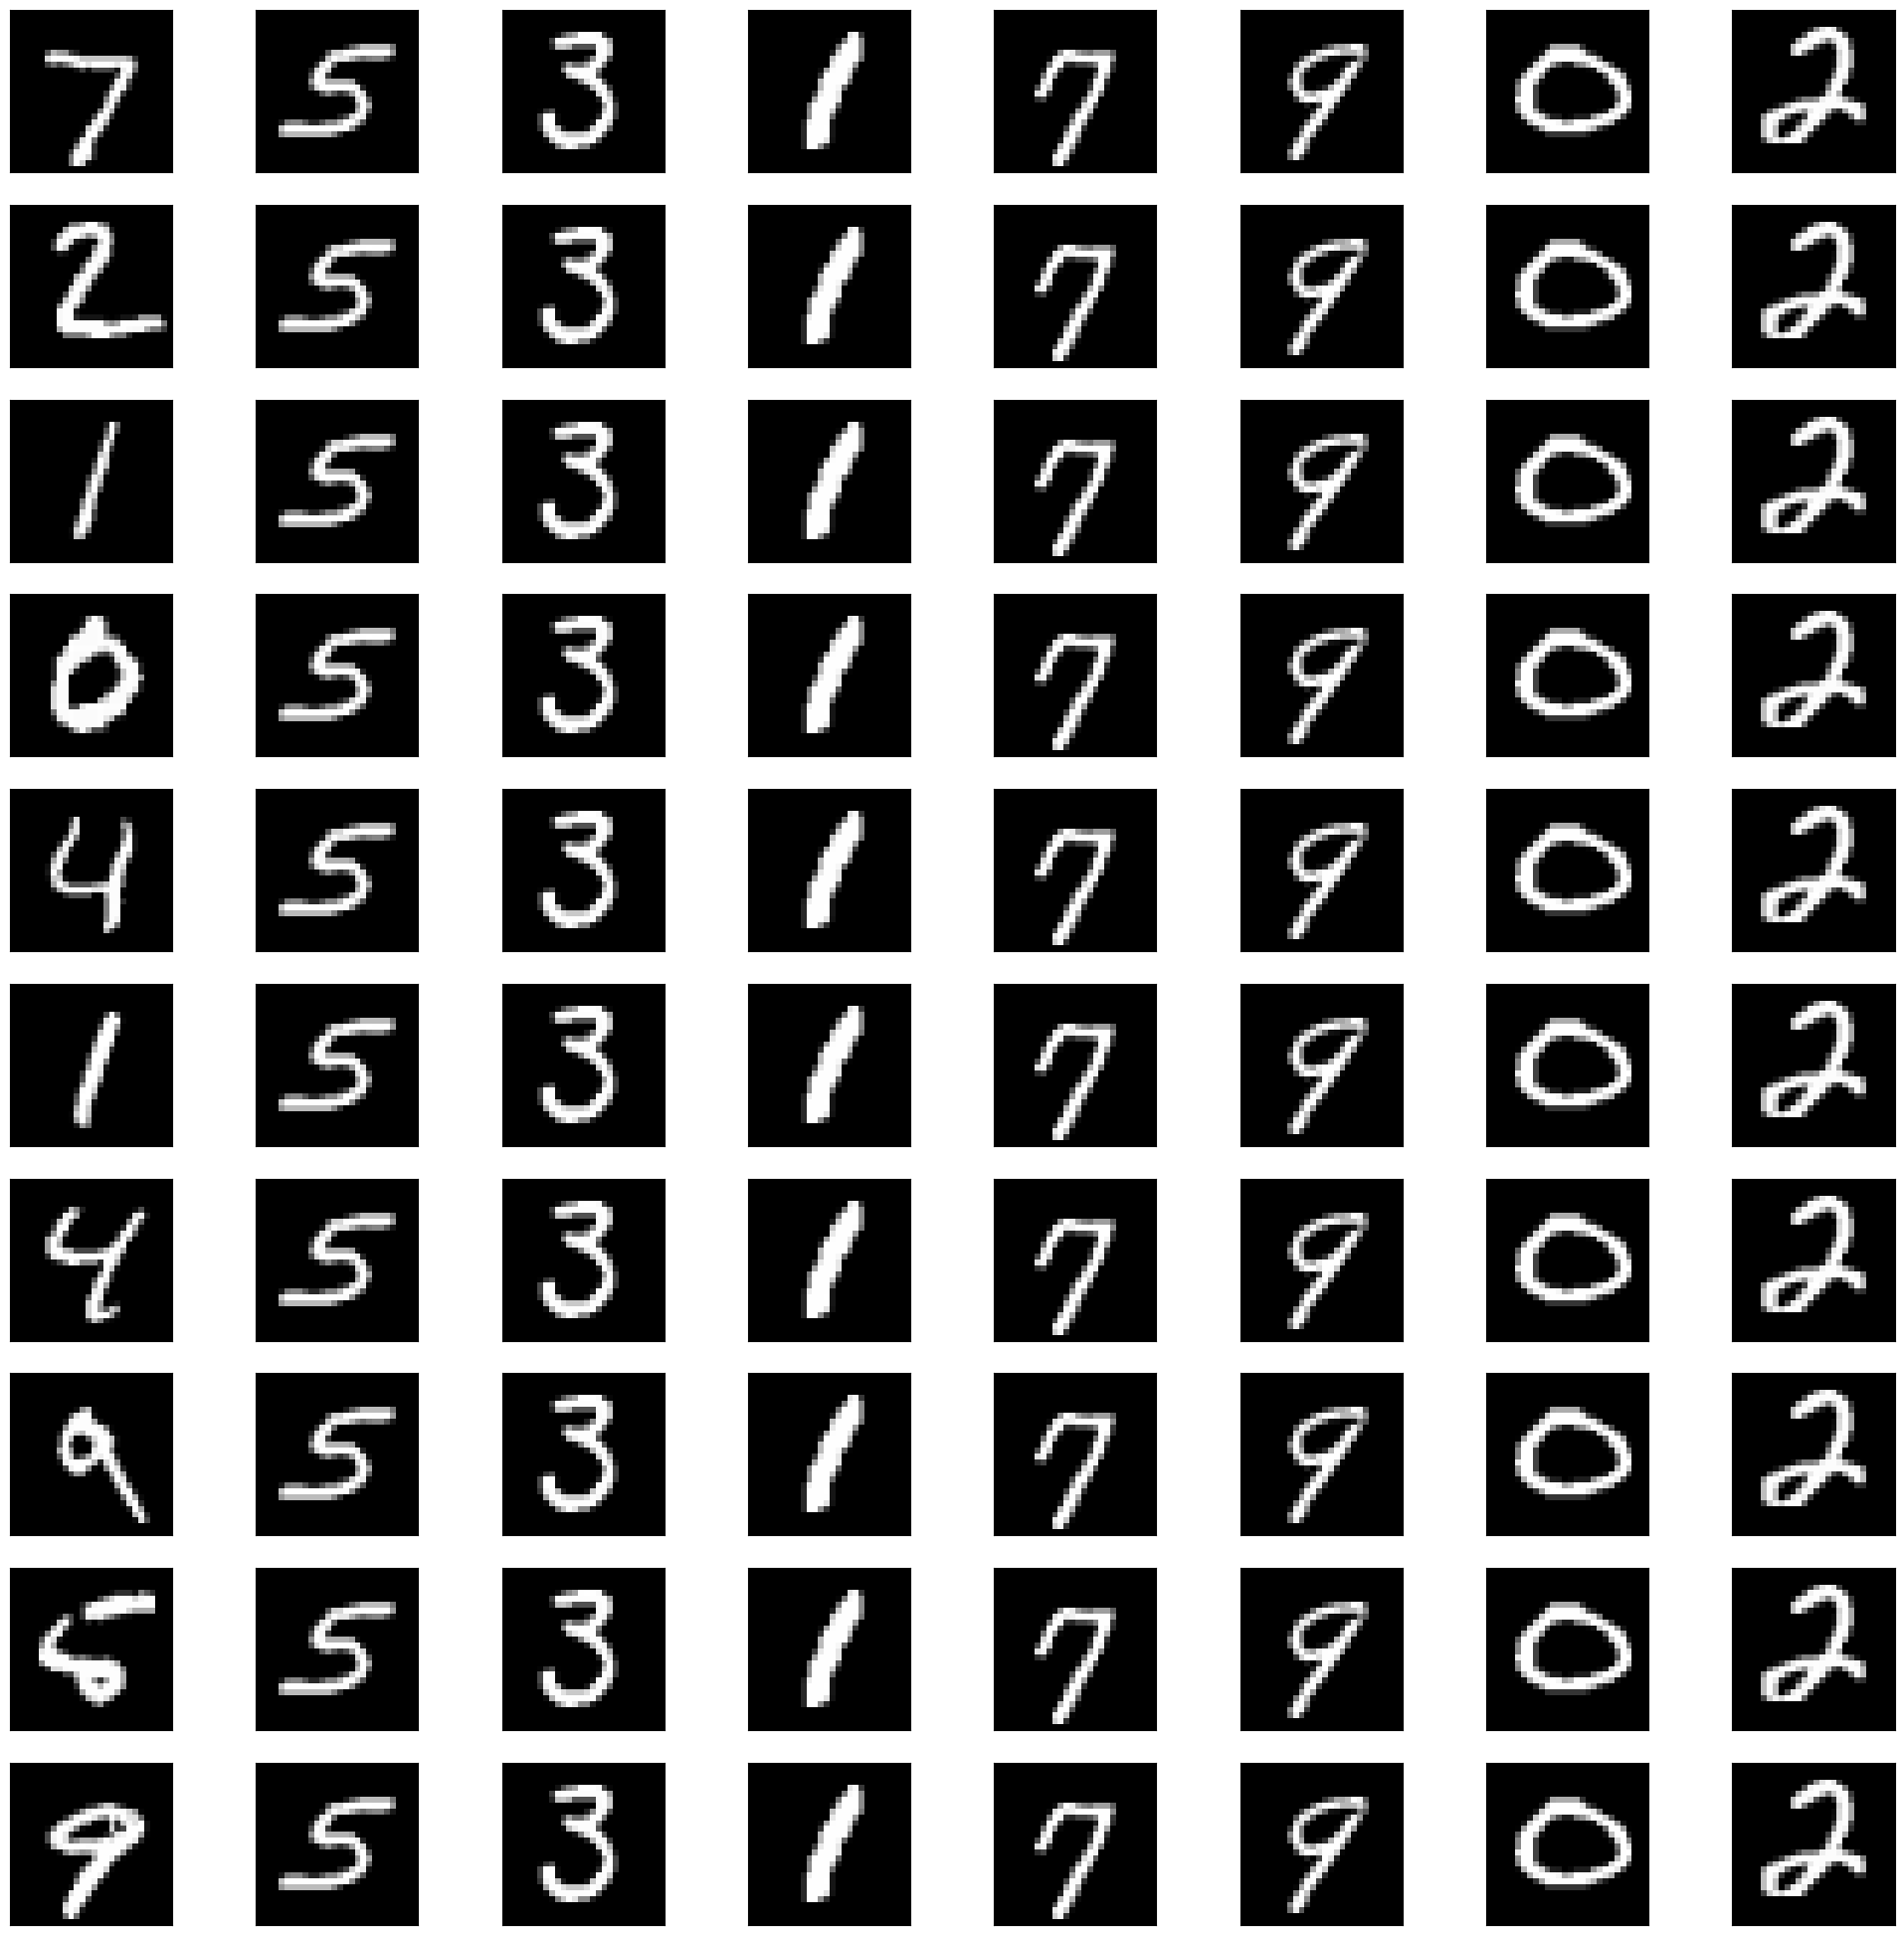

In [101]:
show_retrieved_images(simple_similar_indexes)

In [102]:
# initialize the training features
trained_features = np.array([], dtype='float32').reshape(0, 4, 7, 7)

In [103]:
# predict the encoder layer features for the training dataset
for data in train_loader:
    images, _ = data
    images = images.to(device)
    predicted_features = encoder.forward(images).cpu().detach().numpy()
    trained_features = np.concatenate((trained_features, predicted_features))

In [104]:
# get similar indices
similar_indexes = get_similar_indexes(encoder, trained_features)

In [105]:
# calculate accuracy for the first 100 test images
print('The accuracy of the convolutional autoencoder:', compute_accuracy(range(100), similar_indexes))

The accuracy of the convolutional autoencoder: 0.9442857142857143


The query image to the left is followed by 7 similar images retrieved from the training data set


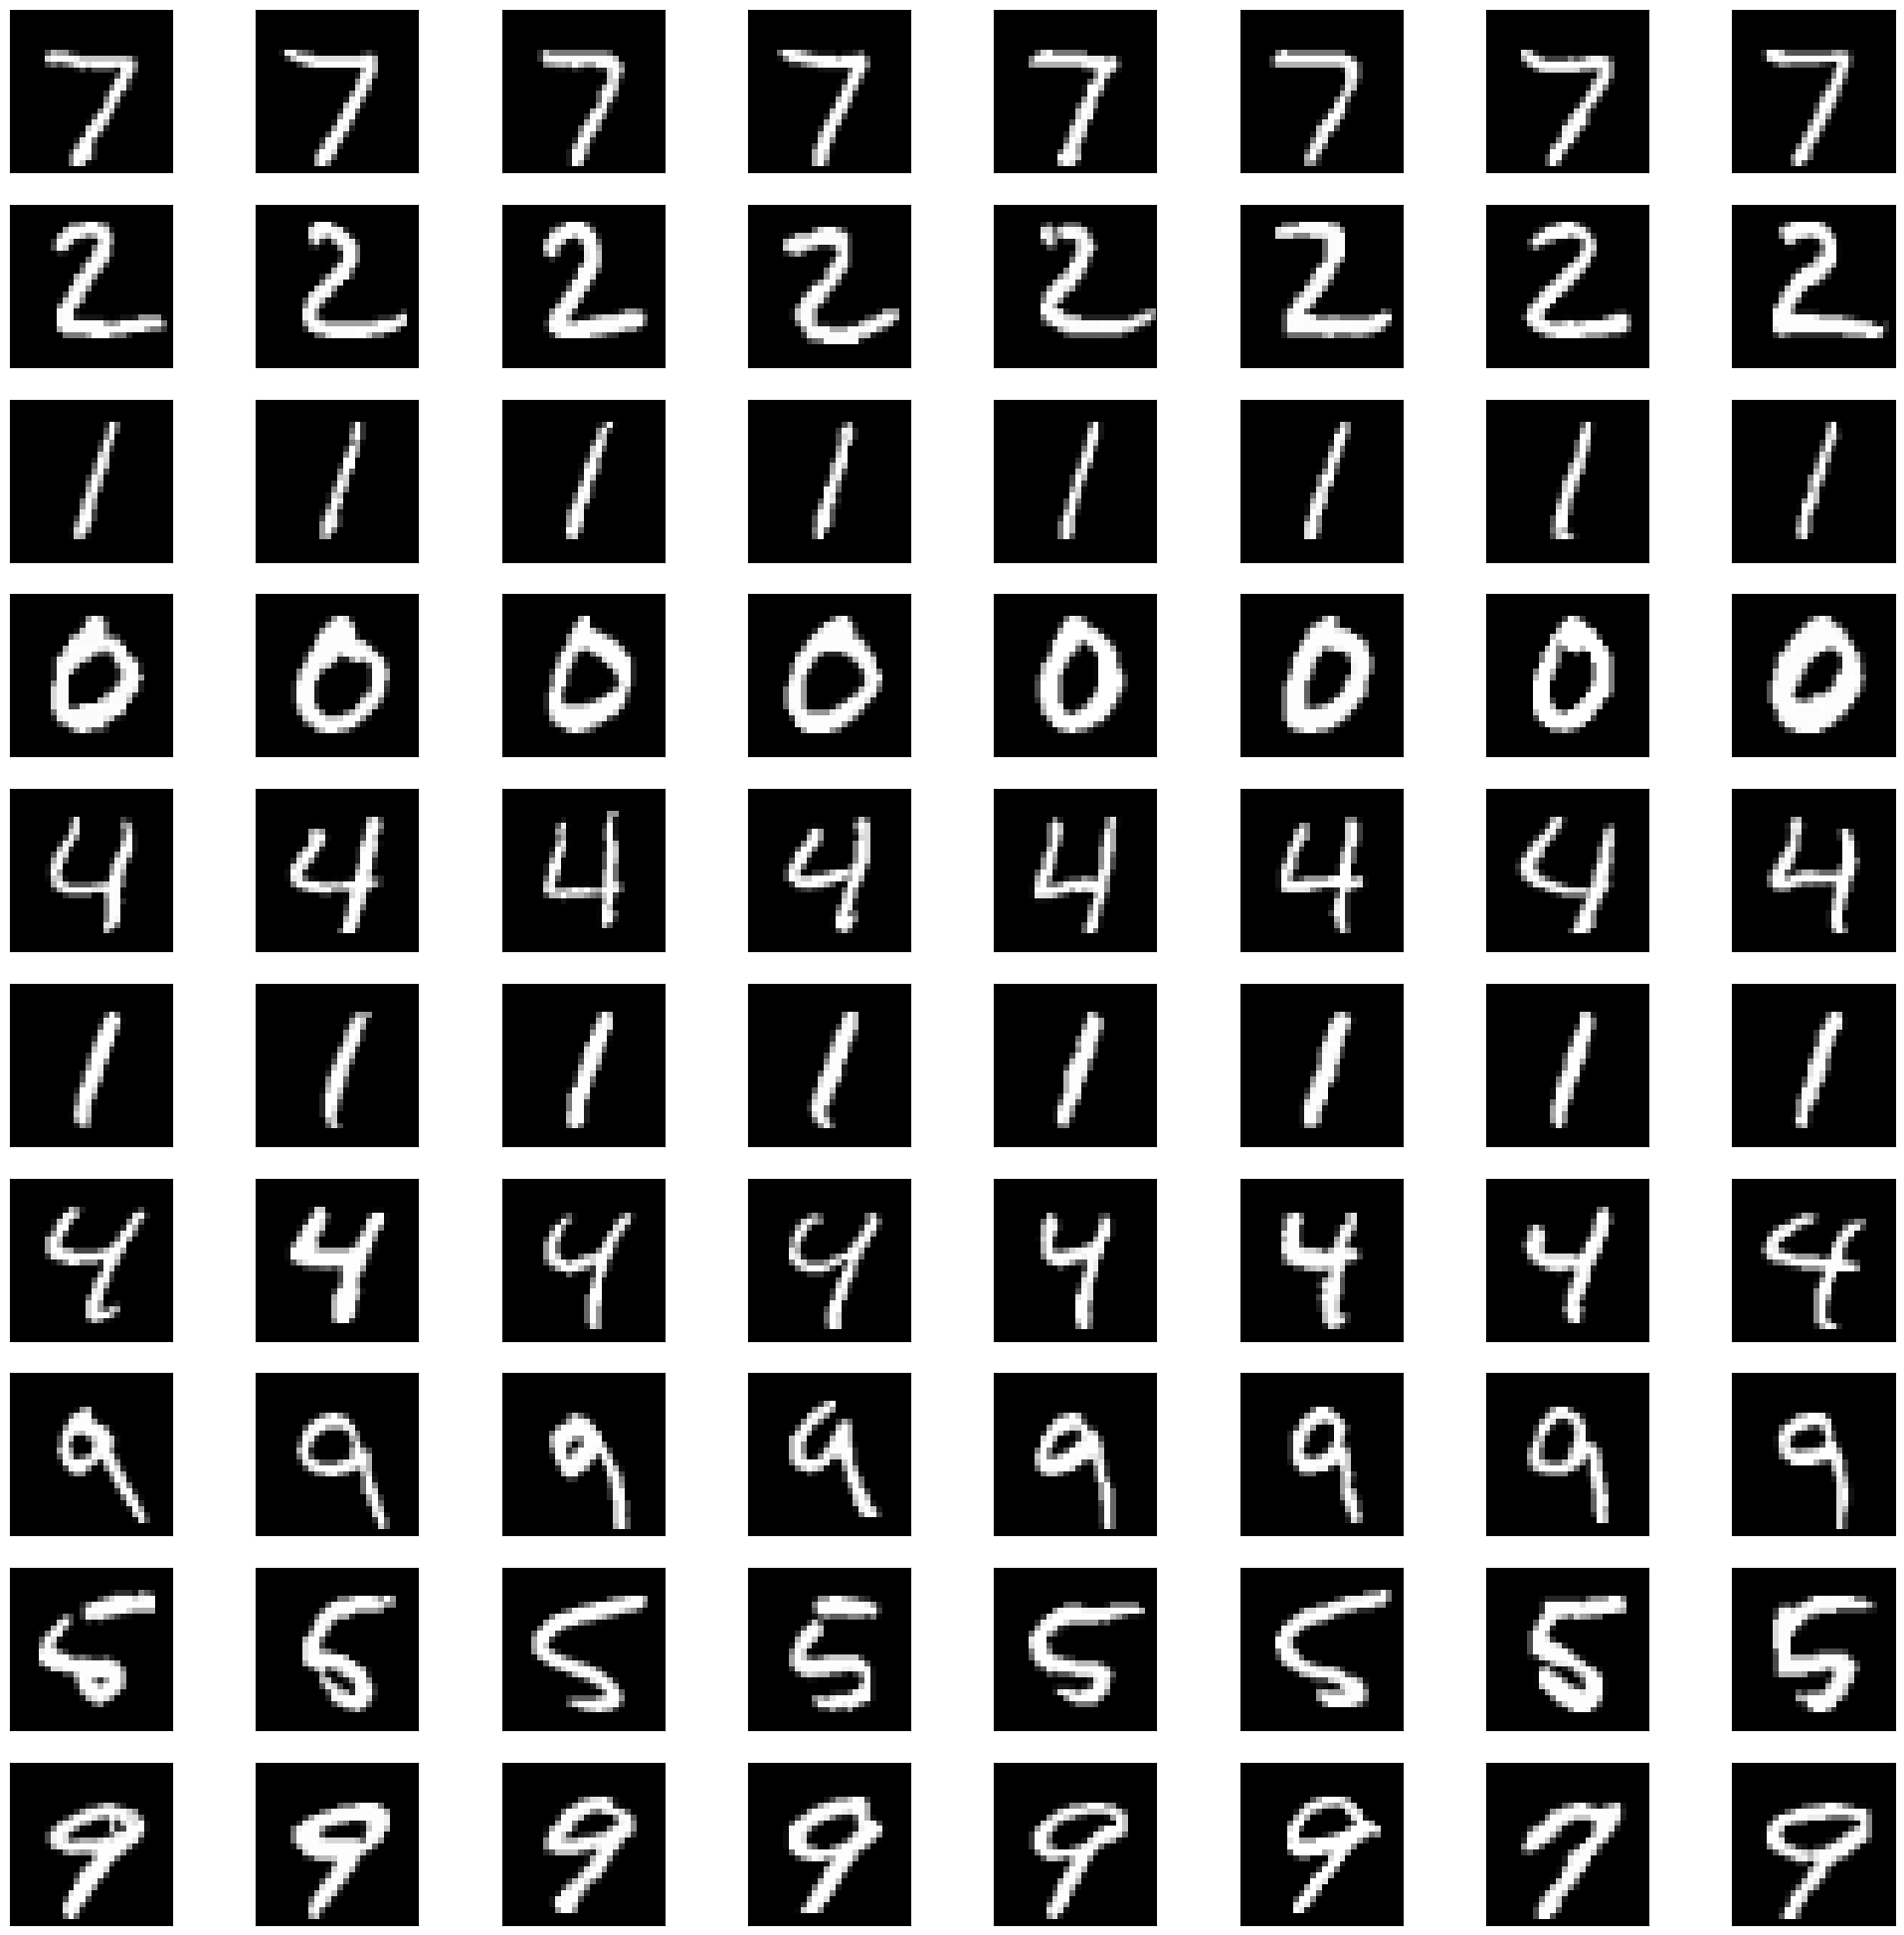

In [106]:
show_retrieved_images(similar_indexes)

In [ ]:
# define the NN architecture
class ConvAutoencoder2(nn.Module):
    def __init__(self):
        super(ConvAutoencoder2, self).__init__()
        ## encoder layers ##
        self.conv1 = nn.Conv2d(1,16,3,padding = 1)
        self.conv2 = nn.Conv2d(16,4,3,padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.batch = nn.BatchNorm2d(16)
        self.batch2 = nn.BatchNorm2d(4)
        ## decoder layers ##
        ## a kernel of 2 and a stride of 2 will increase the spatial dims by 2
        self.t_conv1 = nn.ConvTranspose2d(4, 16, 2, stride=2)
        self.t_conv2 = nn.ConvTranspose2d(16, 1, 2, stride=2)


    def forward(self, x):
        ## encode ##
        x = F.relu(self.batch(self.conv1(x)))
        x = self.pool(x)
        x = F.relu(self.batch2(self.conv2(x)))
        x = self.pool(x)
        ## decode ##
        ## apply ReLu to all hidden layers *except for the output layer
        ## apply a sigmoid to the output layer
        x = F.relu(self.t_conv1(x))
        x = F.sigmoid(self.t_conv2(x))

        return x


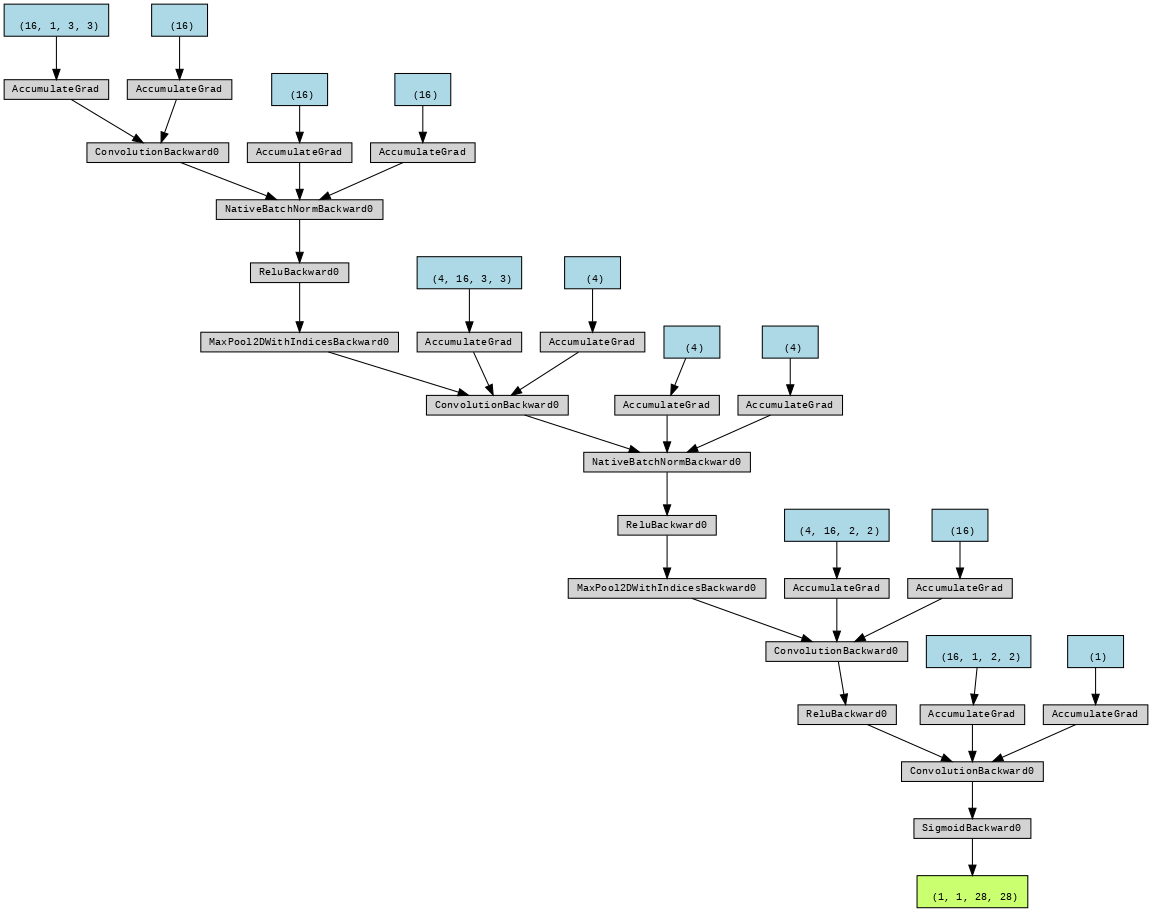

In [107]:

# initialize the convolutional Autoencoder
model_refined = ConvAutoencoder2()

# Create a random input tensor with the appropriate size
sample_input = torch.randn((1, 1, 28, 28))

# Pass the input through the model and generate a graph
output = model_refined(sample_input)
graph = make_dot(output, params=dict(model.named_parameters()))

# Save the graph as a PNG file
graph.render(filename='/content/drive/MyDrive/Career/CODE/MNIST Image Retrevial/assets/conv_autoencoder_graph2', format='png', cleanup=True)
display(Image(filename='/content/drive/MyDrive/Career/CODE/MNIST Image Retrevial/assets/conv_autoencoder_graph2.png'))

In [108]:
# specify loss function
criterion = nn.MSELoss()
# specify loss function
optimizer = torch.optim.Adam(model_refined.parameters(), lr=0.01)

In [109]:
# number of epochs to train the model
n_epochs = 100
train_model(model_refined, optimizer, criterion, device, n_epochs)

Epoch: 1 	Training Loss: 0.290742
Epoch: 2 	Training Loss: 0.182904
Epoch: 3 	Training Loss: 0.175500
Epoch: 4 	Training Loss: 0.172634
Epoch: 5 	Training Loss: 0.171166
Epoch: 6 	Training Loss: 0.170329
Epoch: 7 	Training Loss: 0.169790
Epoch: 8 	Training Loss: 0.169367
Epoch: 9 	Training Loss: 0.169030
Epoch: 10 	Training Loss: 0.168712
Epoch: 11 	Training Loss: 0.168478
Epoch: 12 	Training Loss: 0.168314
Epoch: 13 	Training Loss: 0.168089
Epoch: 14 	Training Loss: 0.167911
Epoch: 15 	Training Loss: 0.167754
Epoch: 16 	Training Loss: 0.167501
Epoch: 17 	Training Loss: 0.167153
Epoch: 18 	Training Loss: 0.166877
Epoch: 19 	Training Loss: 0.166629
Epoch: 20 	Training Loss: 0.166420
Epoch: 21 	Training Loss: 0.166237
Epoch: 22 	Training Loss: 0.166051
Epoch: 23 	Training Loss: 0.165897
Epoch: 24 	Training Loss: 0.165771
Epoch: 25 	Training Loss: 0.165647
Epoch: 26 	Training Loss: 0.165521
Epoch: 27 	Training Loss: 0.165381
Epoch: 28 	Training Loss: 0.165234
Epoch: 29 	Training Loss: 0.1

In [110]:
PATH2 = '/content/drive/MyDrive/Career/CODE/MNIST Image Retrevial/assets/refined_autoencoder.pt'
torch.save(model_refined.state_dict(), PATH2)

In [111]:
class ConvEncoder2(nn.Module):
    def __init__(self):
        super(ConvEncoder2, self).__init__()
        ## encoder layers ##
        self.layer1 = nn.Sequential(*list(model_refined.children())[:3])
        self.pool = [*list(model_refined.children())][2]

    def forward(self, x):
        ## encode ##
        x = self.layer1(x)
        x = self.pool(x)

        return x

# initialize the Encoder
encoder_refined = ConvEncoder2()
encoder_refined.to(device)

ConvEncoder2(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [112]:
# initialize the training features
trained_features_refined = np.array([], dtype='float32').reshape(0, 4, 7, 7)

# predict the encoder layer features for the training dataset
for data in train_loader:
    images, _ = data
    images = images.to(device)
    predicted_features = encoder_refined.forward(images).cpu().detach().numpy()
    trained_features_refined = np.concatenate((trained_features_refined, predicted_features))

In [113]:
# get similar indices
similar_indexes_refined = get_similar_indexes(encoder_refined, trained_features_refined)

In [114]:
# calculate accuracy for the first 100 test images
print('The accuracy of the refined convolutional autoencoder:', compute_accuracy(range(100), similar_indexes_refined))

The accuracy of the refined convolutional autoencoder: 0.9328571428571428


The query image to the left is followed by 7 similar images retrieved from the training data set


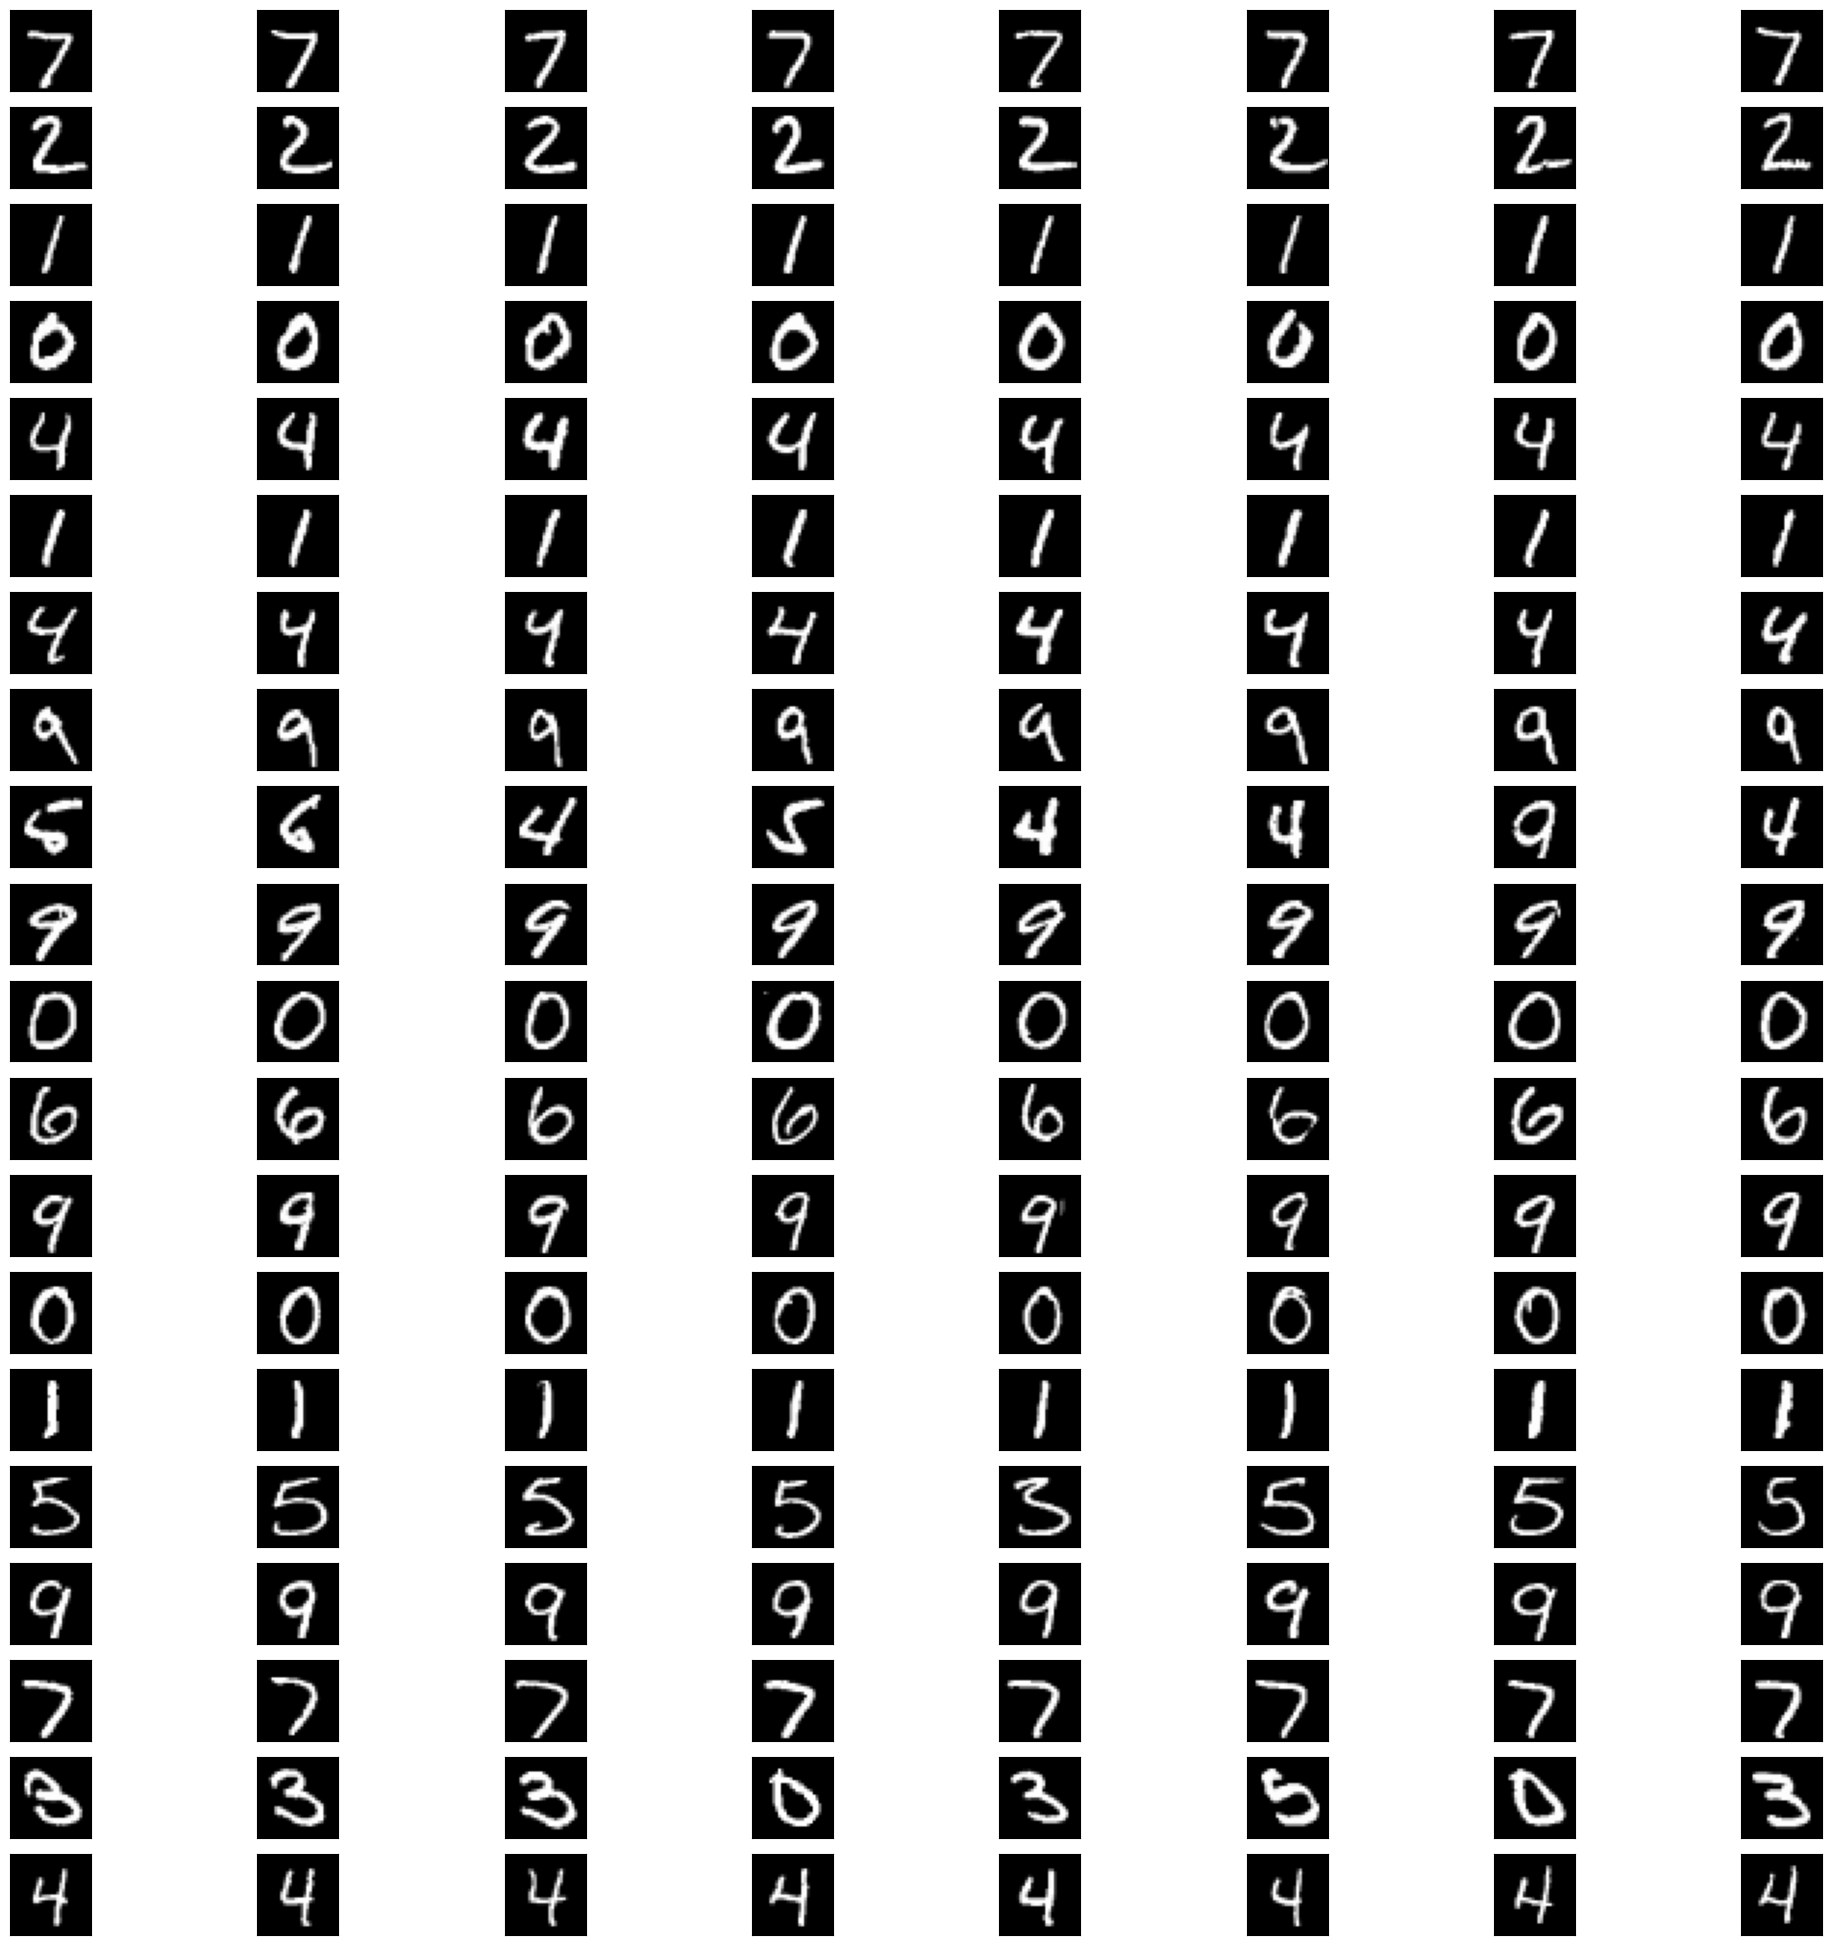

In [115]:
show_retrieved_images(similar_indexes_refined, n = 20)